In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
mutations = pd.read_csv('data/RNAP_MUTATIONS.csv')

In [68]:
mutations[mutations.IS_MINOR_ALLELE == False]

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS
0,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
1,site.01.subj.DR0682.lab.DR0682.iso.1,rpoB,A1075A,gct,gcc,NaN,NaN,1075.0,True,NaN,NaN,1075.0,A,1.0,False,NaN,NaN
2,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
3,site.01.subj.DR0674.lab.DR0674.iso.1,rpoB,E561E,gag,gaa,NaN,NaN,561.0,True,NaN,NaN,561.0,E,1.0,False,NaN,NaN
4,site.01.subj.DR0134.lab.DR0134.iso.1,rpoB,S450L,tcg,ttg,NaN,NaN,450.0,True,NaN,NaN,450.0,L,1.0,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176550,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoB,1326_del_gttgaccca,NaN,NaN,1326.0,761132.0,1326.0,True,-9.0,gttgaccca,NaN,NaN,NaN,False,NaN,NaN
176551,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,A172V,gcc,gtc,NaN,NaN,172.0,True,NaN,NaN,172.0,V,1.0,False,NaN,NaN
176552,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,R173R,cgg,agg,NaN,NaN,173.0,True,NaN,NaN,173.0,R,1.0,False,NaN,NaN
176553,site.07.subj.718655D6-1333-4F67-AABF-09C7E521D...,rpoC,P601L,ccg,ctg,NaN,NaN,601.0,True,NaN,NaN,601.0,L,1.0,False,NaN,NaN


In [69]:
#load known resistance mutations from EFFECTS table
effects = pd.read_pickle('data/EFFECTS.pkl.gz')
effects.reset_index(inplace = True)
effects['GENE_MUTATION'] = effects['GENE'].astype(str) + '_' + effects['MUTATION']
effects = effects[(effects.DRUG=='RIF') & (effects.PREDICTION=='R') 
                  & (~effects.MUTATION.str[-1].isin(['O','X']))]

resistance_mutations = effects.GENE_MUTATION.unique()
len(resistance_mutations)

128

In [70]:
#load list of CMs from previous paper
CMs = pd.read_csv('data/final_CM_hit_list.csv')
CMs = CMs[CMs.homoplasy == True]
CMs

compensatory_mutations = CMs['putative CM'].unique()
compensatory_mutations

array(['rpoC_V483G', 'rpoC_I491V', 'rpoC_V483A', 'rpoC_I491T',
       'rpoC_P1040R', 'rpoC_F452S', 'rpoB_L731P', 'rpoC_N698S',
       'rpoC_D485Y', 'rpoC_V517L', 'rpoC_G332S', 'rpoC_V1252L',
       'rpoA_T187A', 'rpoC_D485N', 'rpoC_L516P', 'rpoC_G433S',
       'rpoB_R827C', 'rpoC_P1040S', 'rpoC_L527V', 'rpoC_G332R',
       'rpoC_P1040A', 'rpoC_K445R', 'rpoC_F452L', 'rpoC_W484G',
       'rpoB_I480V', 'rpoA_V183G', 'rpoB_K891E', 'rpoC_N416S',
       'rpoB_Q409R', 'rpoC_V1039A', 'rpoB_P45S', 'rpoC_A521D',
       'rpoC_L507V', 'rpoC_V431M', 'rpoB_I488V', 'rpoC_V1252M',
       'rpoB_A286V', 'rpoC_T812I', 'rpoB_R827L', 'rpoC_L449V',
       'rpoC_N698K', 'rpoC_F452C', 'rpoA_A180V', 'rpoC_E1033A',
       'rpoA_D190G', 'rpoA_G31S', 'rpoC_P434R', 'rpoA_E184D',
       'rpoC_S561P', 'rpoC_G388A', 'rpoB_I491L'], dtype=object)

In [74]:
#add resistance and compensatory mutation flags to mutations table: need to check for minor allele before concatenating GENE_MUTATION 
mutations['GENE_MUTATION'] = np.where(
    mutations['IS_MINOR_ALLELE'],  # Condition: if IS_MINOR_ALLELE is True
    mutations['GENE'].astype(str) + '_' + mutations['MINOR_MUTATION'].astype(str),  # Then: use GENE + MINOR_MUTATION
    mutations['GENE'].astype(str) + '_' + mutations['MUTATION'].astype(str)  # Else: use GENE + MUTATION
)
    
mutations['RESISTANT_MUTATION'] = mutations['GENE_MUTATION'].isin(resistance_mutations)
mutations['COMPENSATORY_MUTATION'] = mutations['GENE_MUTATION'].isin(compensatory_mutations)

In [75]:
mutations[mutations.IS_MINOR_ALLELE]

,UNIQUEID,GENE,MUTATION,REF,ALT,NUCLEOTIDE_NUMBER,NUCLEOTIDE_INDEX,GENE_POSITION,CODES_PROTEIN,INDEL_LENGTH,INDEL_NUCLEOTIDES,AMINO_ACID_NUMBER,AMINO_ACID_SEQUENCE,NUMBER_NUCLEOTIDE_CHANGES,IS_MINOR_ALLELE,MINOR_MUTATION,FRS,GENE_MUTATION,RESISTANT_MUTATION,COMPENSATORY_MUTATION
19,site.01.subj.DR0611.lab.DR0611.iso.1,rpoB,Y308Z,tat,zzz,NaN,NaN,308.0,True,NaN,NaN,308.0,C,1.0,True,Y308C,0.865,rpoB_Y308C,False,False
178,site.01.subj.DR0589.lab.DR0589.iso.1,rpoB,H445Z,cac,zzz,NaN,NaN,445.0,True,NaN,NaN,445.0,N,1.0,True,H445N,0.283,rpoB_H445N,True,False
179,site.01.subj.DR0589.lab.DR0589.iso.1,rpoB,L452Z,ctg,zzz,NaN,NaN,452.0,True,NaN,NaN,452.0,P,1.0,True,L452P,0.640,rpoB_L452P,True,False
180,site.01.subj.DR0589.lab.DR0589.iso.1,rpoB,Q432Z,caa,zzz,NaN,NaN,432.0,True,NaN,NaN,432.0,K,1.0,True,Q432K,0.098,rpoB_Q432K,True,False
320,site.01.subj.DR0656.lab.DR0656.iso.1,rpoB,D435Z,gac,zzz,NaN,NaN,435.0,True,NaN,NaN,435.0,V,1.0,True,D435V,0.697,rpoB_D435V,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176432,site.07.subj.B2BA5DAF-6370-4E99-B3E9-782C61686...,rpoB,V994Z,gtg,zzz,NaN,NaN,994.0,True,NaN,NaN,994.0,V,1.0,True,V994V,0.250,rpoB_V994V,False,False
176433,site.07.subj.B2BA5DAF-6370-4E99-B3E9-782C61686...,rpoB,V996Z,gtc,zzz,NaN,NaN,996.0,True,NaN,NaN,996.0,V,1.0,True,V996V,0.240,rpoB_V996V,False,False
176434,site.07.subj.B2BA5DAF-6370-4E99-B3E9-782C61686...,rpoB,Y308Z,tat,zzz,NaN,NaN,308.0,True,NaN,NaN,308.0,Y,1.0,True,Y308Y,0.283,rpoB_Y308Y,False,False
176435,site.07.subj.B2BA5DAF-6370-4E99-B3E9-782C61686...,rpoB,Y338Z,tat,zzz,NaN,NaN,338.0,True,NaN,NaN,338.0,Y,1.0,True,Y338Y,0.271,rpoB_Y338Y,False,False


In [88]:
#group by UNIQUEIDs, since we have multiple mutations per UNIQUEID
contingency = mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()
contingency

,RESISTANT_MUTATION,COMPENSATORY_MUTATION
UNIQUEID,,
site.00.subj.1000347.lab.H111540004.iso.1,True,False
site.00.subj.1000595.lab.H123460044.iso.1,True,True
site.00.subj.1004213.lab.H111060034.iso.1,True,True
site.00.subj.1004213.lab.H112000008.iso.1,True,True
site.00.subj.1004213.lab.H113100007.iso.1,True,True
...,...,...
site.35.subj.95.lab.IE19.iso.1,True,True
site.35.subj.96.lab.IE20.iso.1,True,False
site.35.subj.97.lab.IE21.iso.1,True,False


Text(0.5, 1.0, 'Contingency table of resistant and compensatory mutations')

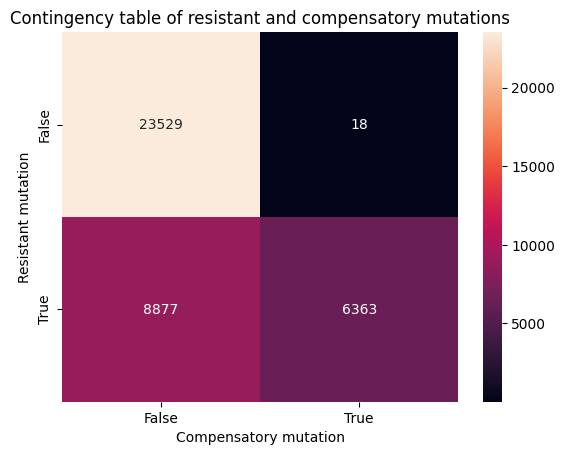

In [89]:
#make a contingency table for resistant UNQIUEIDs vs compensated UNIQUEIDs
contingency_table = pd.crosstab(contingency.RESISTANT_MUTATION, contingency.COMPENSATORY_MUTATION)
contingency_table

#plot the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d')
plt.xlabel('Compensatory mutation')
plt.ylabel('Resistant mutation')
plt.title('Contingency table of resistant and compensatory mutations')

Text(0.5, 1.0, 'Major Allele Mutations')

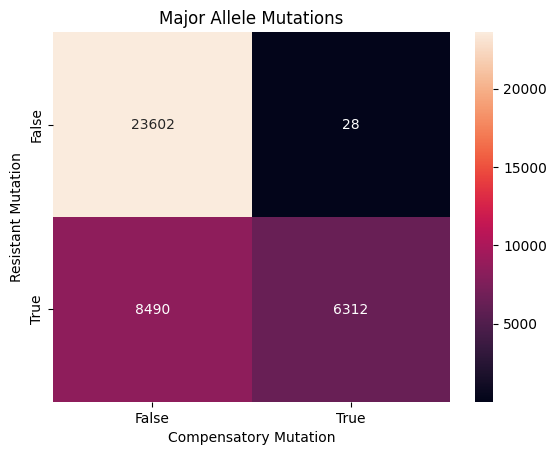

In [83]:
#now we want to look at this in the groups of major and monor alleles separately: divide mutations dataset in major and minor resistant mutations
major_mutations = mutations[mutations.IS_MINOR_ALLELE == False]
minor_mutations = mutations[mutations.IS_MINOR_ALLELE == True]

#group by UNIQUEIDs, since we have multiple mutations per UNIQUEID
major_contingency = major_mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()
minor_contingency = minor_mutations.groupby('UNIQUEID')[['RESISTANT_MUTATION','COMPENSATORY_MUTATION']].max()

#make a contingency table for resistant UNQIUEIDs vs compensated UNIQUEIDs
major_contingency_table = pd.crosstab(major_contingency.RESISTANT_MUTATION, major_contingency.COMPENSATORY_MUTATION)
minor_contingency_table = pd.crosstab(minor_contingency.RESISTANT_MUTATION, minor_contingency.COMPENSATORY_MUTATION)

#plot the major contingency table
sns.heatmap(major_contingency_table, annot=True, fmt='d')
plt.xlabel('Compensatory Mutation')
plt.ylabel('Resistant Mutation')
plt.title('Major Allele Mutations')


Text(0.5, 1.0, 'Minor Allele Mutations')

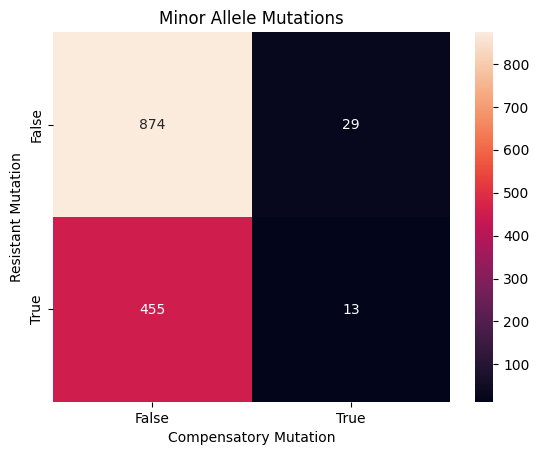

In [84]:
#plot the minor contingency table
sns.heatmap(minor_contingency_table, annot=True, fmt='d')
plt.xlabel('Compensatory Mutation')
plt.ylabel('Resistant Mutation')
plt.title('Minor Allele Mutations')

In [90]:
#calculate ratio of compensated samples in major vs minor resistant samples
print(major_contingency_table.iloc[1,1] / major_contingency_table.iloc[1,0])

print(minor_contingency_table.iloc[1,1] / minor_contingency_table.iloc[1,0])


0.7434628975265017
0.02857142857142857


In [ ]:
#There could be multiple explanations, depending on the time-point of sampling:
# 1) the sample was taken during drug administration, and the resistant sub popualtion is only beginning to out-compete the sensitive population. Maybe the resistance was also acquired in the host. There is no need for compensation, as the antibiotic is present.
# 2) the sample was taken before antibiotic treatment, and 